# Ejercicio 1 - Preparar el ambiente de trabajo

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

import missingno as msngo
import warnings

from IPython.display import display, Markdown

warnings.filterwarnings('ignore')

plt.rcParams;

In [3]:
df = pd.read_csv('breast_cancer.csv').drop(columns=['id', 'Unnamed: 32'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# En primera instancia, la columna 'diagnosis' indica M para maligno y B para Benigno, 
# pero lo dejaremos como 1 = maligno y 0 = benigno

df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Ejercicio 2: Visualizando la distribución de los atributos

Histogramas para cada atributo, condicional a cada clase del vector objetivo. 

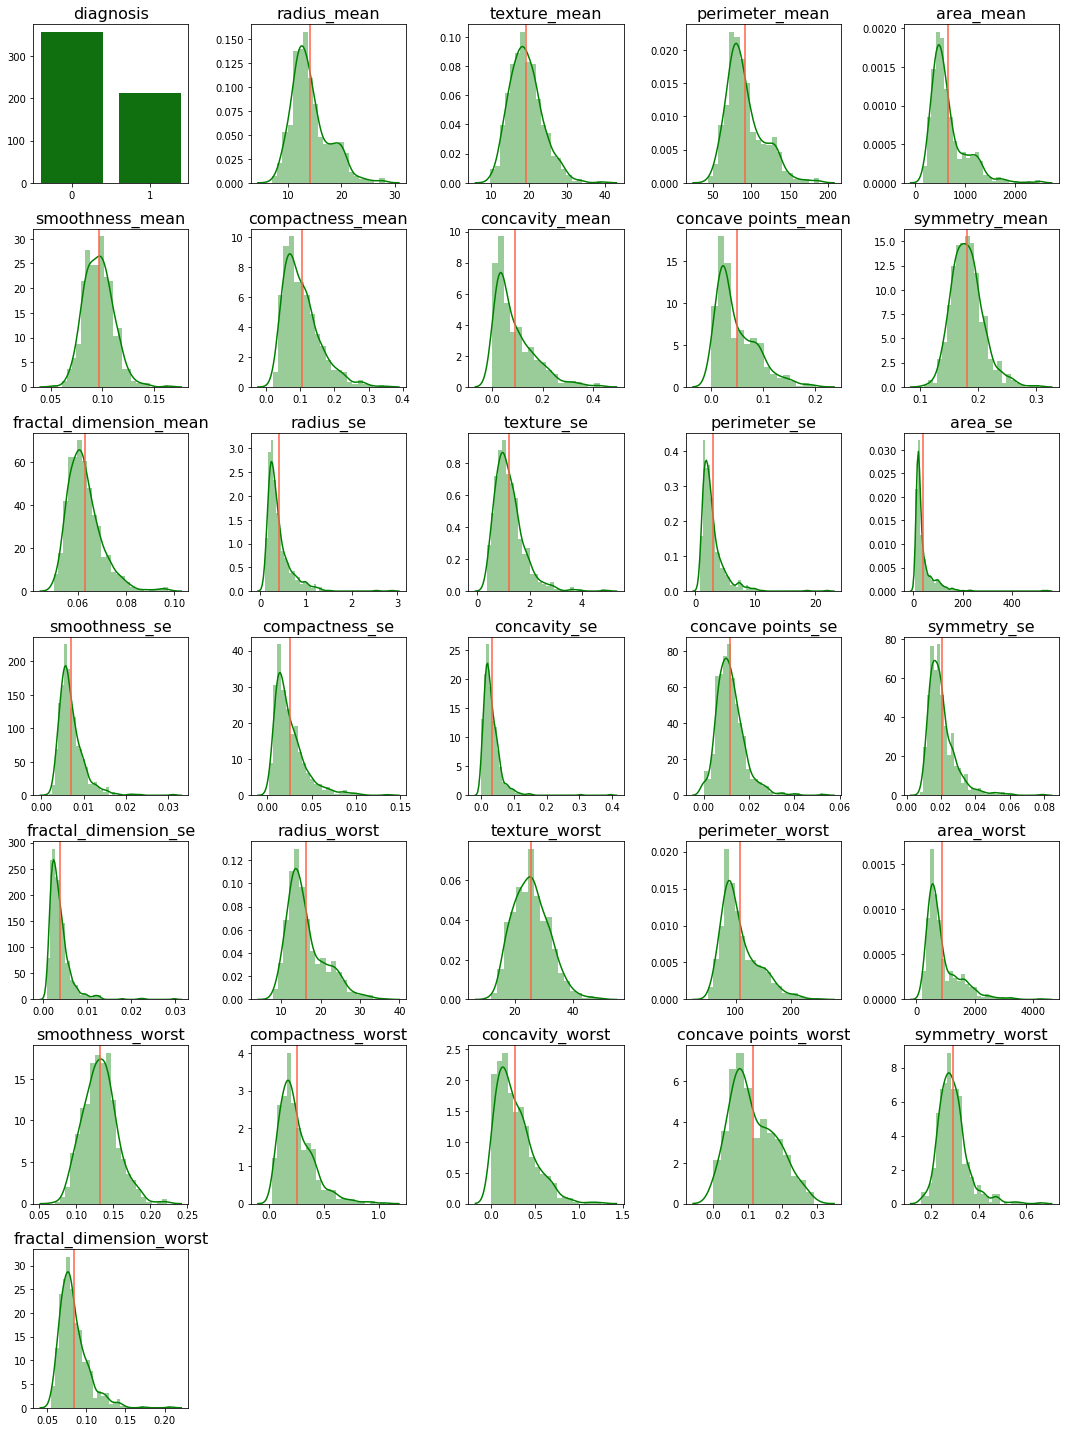

In [6]:
def histograma(df, cols):
    
    plt.figure(figsize=(15,20))
    rows = df.shape[1] / (cols - 1)
    
    for index, (colname, serie) in enumerate(df.iteritems()):
        plt.subplot(rows, cols, index + 1)
        if pd.api.types.is_float_dtype(serie) is True:
            sns.distplot(serie, color="green")
            plt.axvline(np.mean(serie), color='tomato')
        elif pd.api.types.is_integer_dtype(serie) is True:
            sns.countplot(serie, color='green')
        plt.title(colname, fontsize=16)
        plt.xlabel('');plt.ylabel('');plt.tight_layout()
        
histograma(df,5)

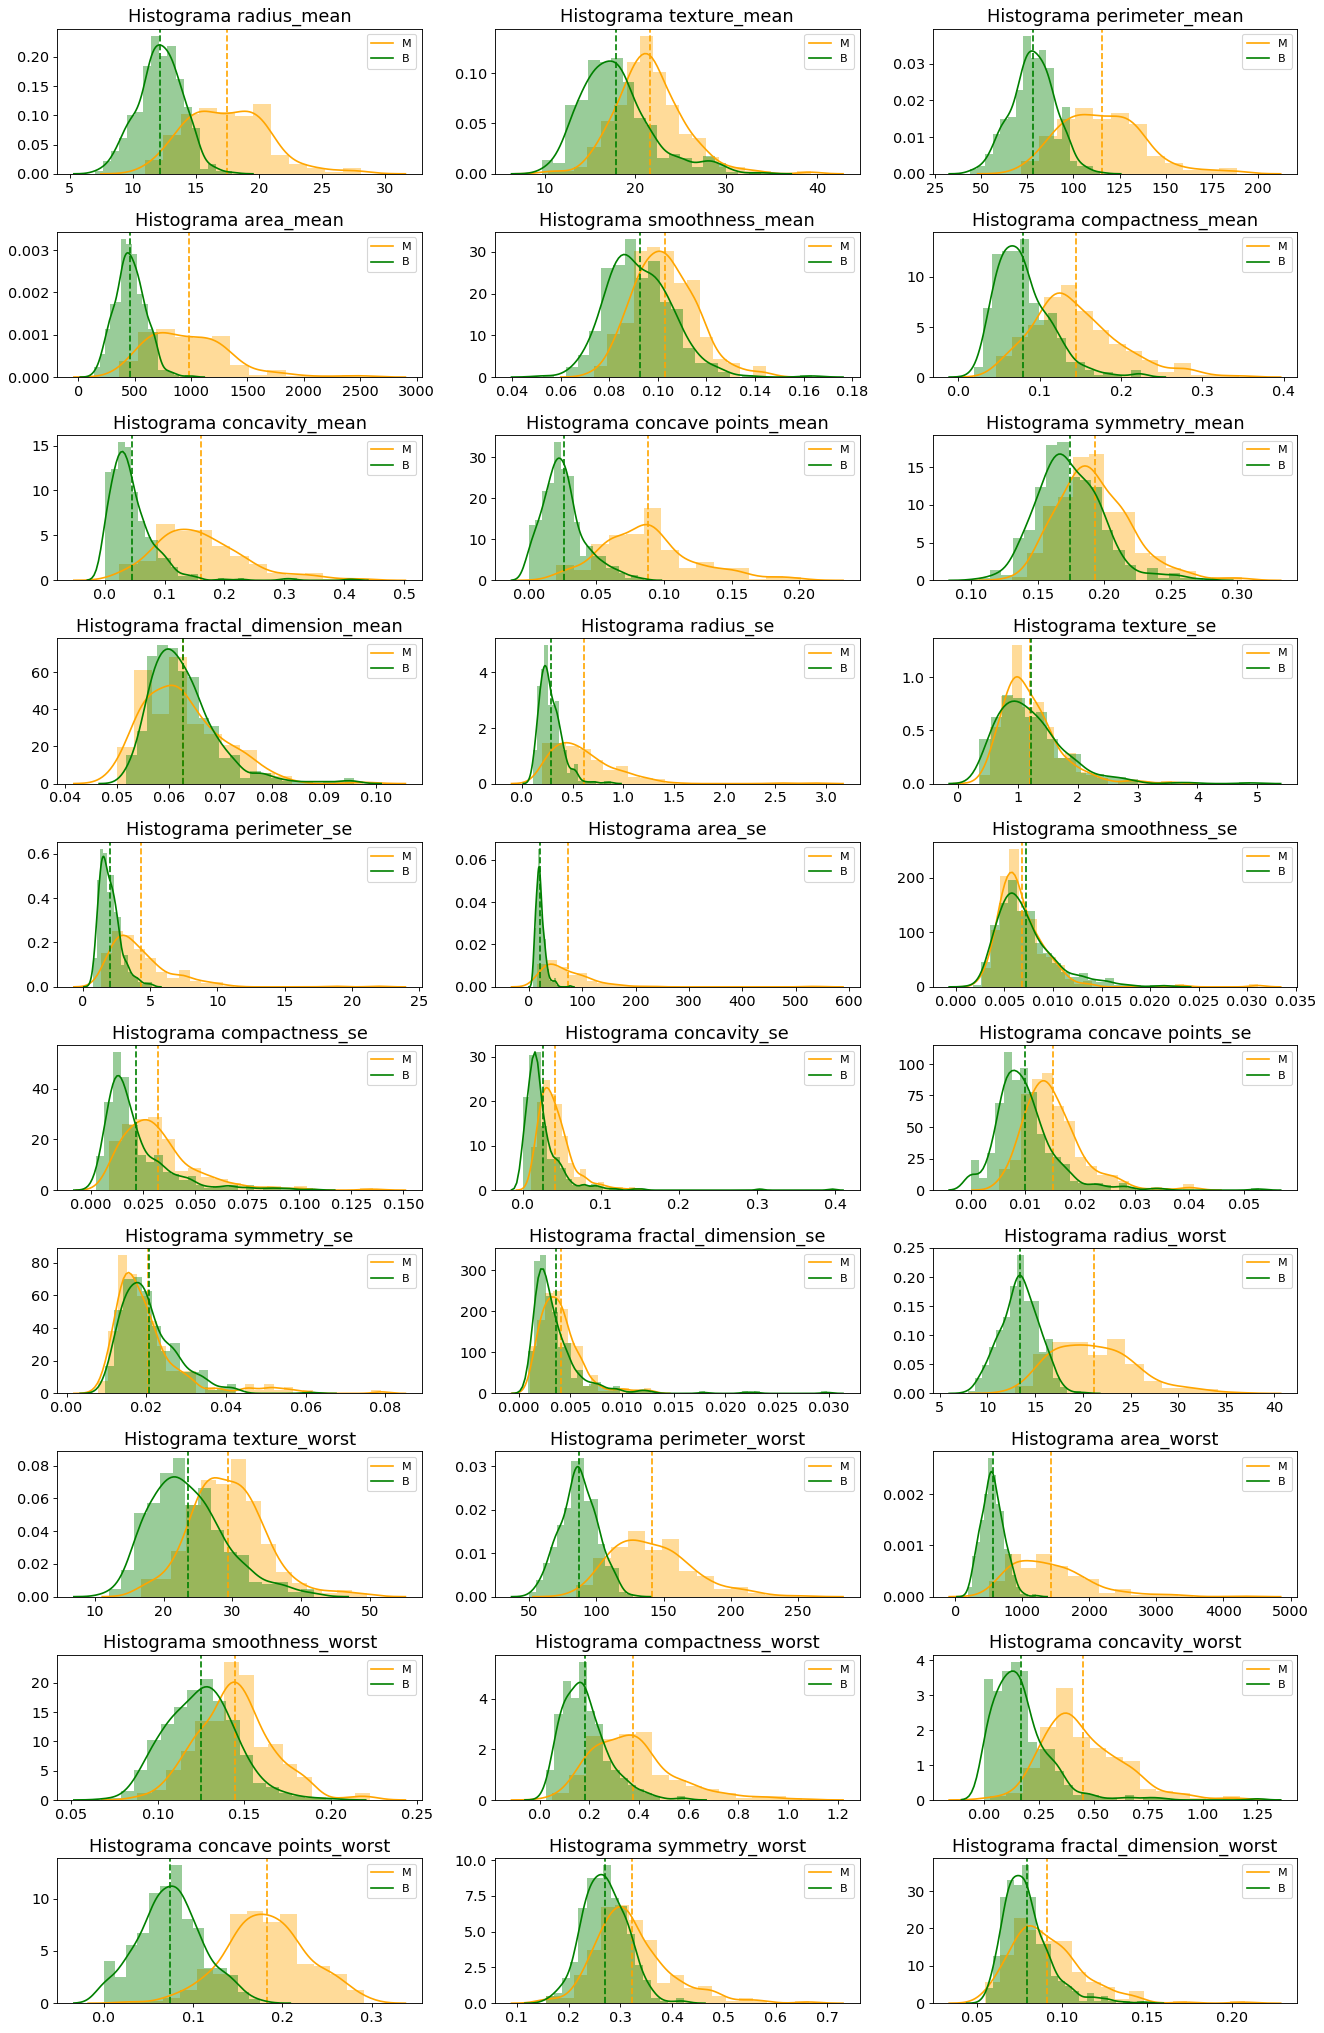

In [7]:
fig = plt.figure(figsize=(20, 100), dpi=80)
fig.subplots_adjust(hspace=0.4, wspace=0.2)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
variables = df.loc[:,'radius_mean':'fractal_dimension_worst'].columns


for index, variable in enumerate(variables):
    ax = fig.add_subplot(len(variables), 3, index + 1)
    
    sns.distplot(df[df['diagnosis']==1][variable], axlabel=False, kde_kws={"label": "M"}, color='orange')
    mean_m = df[df['diagnosis']==1][variable].mean()
    ax.axvline(mean_m, linestyle='--', color='orange')
    
    sns.distplot(df[df['diagnosis']==0][variable], axlabel=False, kde_kws={"label": "B"}, color='green')
    mean_b = df[df['diagnosis']==0][variable].mean()
    ax.axvline(mean_b, linestyle='--', color='green')
    
    ax.set_title('Histograma {}'.format(variable), size = 16)

Los rasgos que mantienen una similitud en las respectivas clases del vector objetivo son: smoothness_mean, symmetry_mean, fractal_dimension_mean, texture_se, smoothness_se, symmetry_se, fratal_dimension_se

# Ejercicio 3 - Estimando el porcentaje de overlap en los atributos

In [8]:
def histogram_overlap(df, attribute, target, perc=100):
    # get lower bound
    empirical_lower_bound = np.floor(df[attribute].min())
    # get upper bound
    empirical_upper_bound = np.ceil(df[attribute].max())
    # preserve histograms
    tmp_hist_holder = dict()
    # for each target class
    for unique_value in np.unique(df[target]):
        # get histogram
        tmp, _ = np.histogram(
        # for a specific attribute
        df[df[target] == unique_value][attribute],
        # define percentage
        bins=perc,
        # limit empirical range for comparison
        range=[empirical_lower_bound, empirical_upper_bound]
        )
        # append to dict
        tmp_hist_holder["h_"+str(unique_value)] = tmp
    get_minima = np.minimum(tmp_hist_holder["h_1"], tmp_hist_holder["h_0"])
    intersection = np.true_divide(np.sum(get_minima),
    np.sum(tmp_hist_holder["h_0"]))
    return intersection

histogram_overlap(df, 'smoothness_mean', 'diagnosis', perc=100)

0.5210084033613446

* Utilizando la función, genere un dataframe donde almacenará el nombre del atributo y su porcentaje. Ordene este dataframe de forma descentente y preserve.

In [9]:
def genera_df_overlap(df):
    attributes = [x for x in df.columns if x != 'diagnosis']
    overlap_perc = []
    for a in attributes:
        overlap_perc.append(round(histogram_overlap(df, a, 'diagnosis', perc=100),2))
    return pd.DataFrame(overlap_perc, index=attributes, columns=['overlap_perc'])

df_overlap_perc = genera_df_overlap(df)
df_overlap_perc.sort_values(by="overlap_perc", ascending=False, inplace=True)
df_overlap_perc

,overlap_perc
fractal_dimension_mean,0.59
fractal_dimension_se,0.59
smoothness_se,0.59
symmetry_se,0.57
texture_se,0.55
compactness_se,0.52
smoothness_mean,0.52
concave points_se,0.51
symmetry_mean,0.51
fractal_dimension_worst,0.49


# Ejercicio 4: Selección del modelo por GridSearchCV

* Entrene una serie de modelos SVC con los siguientes hiperparámetros: 
    * C: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    * gamma: [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
    * Validaciones cruzadas: 10

Definimos Hiperparámetros

In [10]:
c_param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
gamma_param_range = [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

Escalamos los atributos

In [11]:
X_scaled = StandardScaler().fit_transform(df.loc[:,'radius_mean':'fractal_dimension_worst'])

Separamos la data en etnrenamiento y testing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['diagnosis'], test_size=.33, random_state=1781)

Entrenamos el modelo con GridSearchCV

In [13]:
params = [{'kernel': ['linear', 'rbf', 'poly'], 
                     'C': c_param_range,
                     'gamma': gamma_param_range
                    }]
svc_grid = GridSearchCV(SVC(probability=True), params, cv=10)
svc_grid.fit(X_train, y_train);

Combinación optima de hiperpapámetros

In [14]:
svc_grid.best_params_

{'C': 0.1, 'gamma': 1e-07, 'kernel': 'linear'}

Visualización de resultados

In [15]:
df_results = pd.DataFrame(svc_grid.cv_results_)
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012929,0.002644,0.000598,0.000489,0.0001,1e-07,linear,"{'C': 0.0001, 'gamma': 1e-07, 'kernel': 'linear'}",0.615385,0.641026,...,0.641026,0.641026,0.631579,0.621622,0.621622,0.621622,0.621622,0.627297,0.010063,101
1,0.018188,0.007611,0.001669,0.004682,0.0001,1e-07,rbf,"{'C': 0.0001, 'gamma': 1e-07, 'kernel': 'rbf'}",0.615385,0.615385,...,0.615385,0.615385,0.631579,0.621622,0.621622,0.621622,0.621622,0.619423,0.004996,114
2,0.015649,0.000057,0.000000,0.000000,0.0001,1e-07,poly,"{'C': 0.0001, 'gamma': 1e-07, 'kernel': 'poly'}",0.615385,0.615385,...,0.615385,0.615385,0.631579,0.621622,0.621622,0.621622,0.621622,0.619423,0.004996,114
3,0.012521,0.003042,0.000482,0.000485,0.0001,0.0001,linear,"{'C': 0.0001, 'gamma': 0.0001, 'kernel': 'line...",0.615385,0.641026,...,0.641026,0.641026,0.631579,0.621622,0.621622,0.621622,0.621622,0.627297,0.010063,101
4,0.018417,0.005511,0.001644,0.004665,0.0001,0.0001,rbf,"{'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}",0.615385,0.615385,...,0.615385,0.615385,0.631579,0.621622,0.621622,0.621622,0.621622,0.619423,0.004996,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.037563,0.005624,0.001358,0.000532,1000,1,rbf,"{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}",0.615385,0.615385,...,0.615385,0.641026,0.631579,0.648649,0.621622,0.621622,0.648649,0.627297,0.013192,101
164,0.007595,0.001807,0.000256,0.000404,1000,1,poly,"{'C': 1000, 'gamma': 1, 'kernel': 'poly'}",0.948718,0.871795,...,0.871795,0.948718,0.947368,0.945946,1.000000,0.972973,0.945946,0.942257,0.039385,71
165,0.006776,0.000782,0.000371,0.000589,1000,10,linear,"{'C': 1000, 'gamma': 10, 'kernel': 'linear'}",0.923077,0.923077,...,0.923077,0.897436,0.973684,1.000000,1.000000,1.000000,1.000000,0.960630,0.038474,44
166,0.042399,0.007061,0.000839,0.000329,1000,10,rbf,"{'C': 1000, 'gamma': 10, 'kernel': 'rbf'}",0.615385,0.615385,...,0.615385,0.615385,0.631579,0.621622,0.621622,0.621622,0.621622,0.619423,0.004996,114


* Genere un heatmap en base a los puntajes estimados con GridSearchCV

Métricas con el kernel Linear

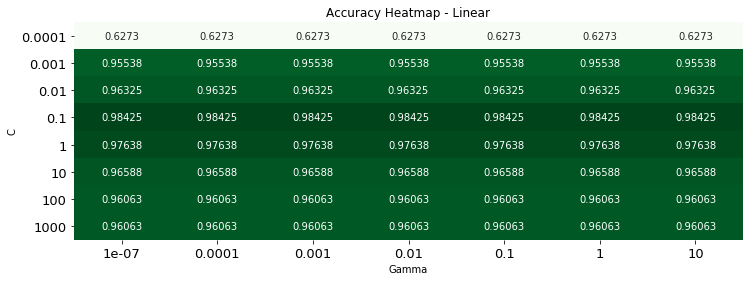

In [16]:
df_results_linear = df_results[df_results['param_kernel'] == 'linear'][['param_C','param_gamma','mean_test_score']].reset_index(drop=True)

scores_matrix_linear = np.array(df_results_linear['mean_test_score']).reshape(8, 7)

plt.figure(figsize=(12, 4))
sns.heatmap(scores_matrix_linear, annot=True, cmap='Greens', cbar=False, xticklabels=gamma_param_range, yticklabels=c_param_range, fmt=".5")
plt.xlabel('Gamma');
plt.ylabel('C');
plt.title('Accuracy Heatmap - Linear');

In [17]:
print('El mejor puntaje con kernel linear es 0.98425 y se da con C=0.1 y Gamma=0.0000001')

El mejor puntaje con kernel linear es 0.98425 y se da con C=0.1 y Gamma=0.0000001


Métricas con el kernel Rbf

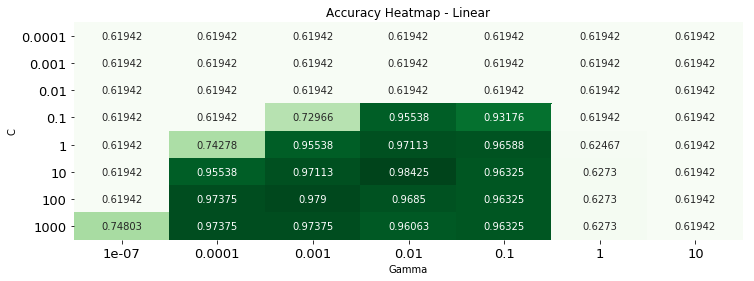

In [18]:
df_results_linear = df_results[df_results['param_kernel'] == 'rbf'][['param_C','param_gamma','mean_test_score']].reset_index(drop=True)

scores_matrix_linear = np.array(df_results_linear['mean_test_score']).reshape(8, 7)

plt.figure(figsize=(12, 4))
sns.heatmap(scores_matrix_linear, annot=True, cmap='Greens', cbar=False, xticklabels=gamma_param_range, yticklabels=c_param_range, fmt=".5")
plt.xlabel('Gamma');
plt.ylabel('C');
plt.title('Accuracy Heatmap - Linear');

In [19]:
print('El mejor puntaje con kernel rbf es 0.98425 y se da con C=10 y Gamma=0.01')

El mejor puntaje con kernel rbf es 0.98425 y se da con C=10 y Gamma=0.01


Métricas con el kernel Poly

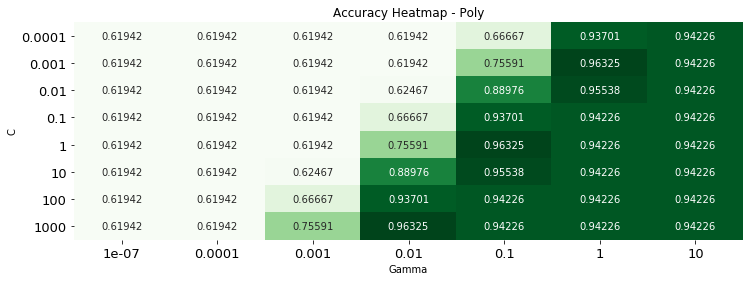

In [20]:
df_results_poly = df_results[df_results['param_kernel'] == 'poly'][['param_C','param_gamma','mean_test_score']].reset_index(drop=True)

scores_matrix_poly = np.array(df_results_poly['mean_test_score']).reshape(8, 7)
plt.figure(figsize=(12, 4))
sns.heatmap(scores_matrix_poly, annot=True, cmap='Greens', cbar=False, xticklabels=gamma_param_range, yticklabels=c_param_range, fmt=".5")
plt.xlabel('Gamma');
plt.ylabel('C');
plt.title('Accuracy Heatmap - Poly');

In [21]:
print('El mejor puntaje con kernel Poly es 0.96325 y se da con C=1 y Gamma=0.1')

El mejor puntaje con kernel Poly es 0.96325 y se da con C=1 y Gamma=0.1


# Ejercicio 5 - Validación del modelo en el hold-out sample

Generación de predicciones

In [23]:
y_hat = svc_grid.best_estimator_.predict(X_test)

Nivel de accuracy

In [25]:
svc_accuracy = accuracy_score(y_test, y_hat)
svc_accuracy

0.9468085106382979

In [26]:
dataframe_class_report = pd.DataFrame(classification_report(y_test, y_hat, output_dict=True))
dataframe_class_report

,0,1,accuracy,macro avg,weighted avg
precision,0.930233,0.983051,0.946809,0.956642,0.949056
recall,0.991736,0.865672,0.946809,0.928704,0.946809
f1-score,0.960000,0.920635,0.946809,0.940317,0.945971
support,121.000000,67.000000,0.946809,188.000000,188.000000


Curva ROC

Text(0.5, 0, 'Faslos Positivos')

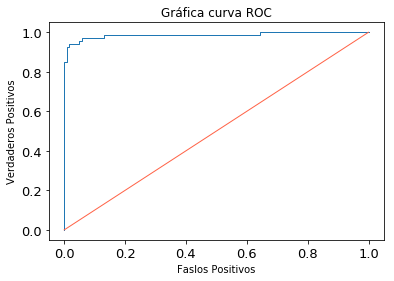

In [60]:
y_hat_pr = svc_grid.best_estimator_.predict_proba(X_test)[:, 1]
false_positive, true_positive, threshold = roc_curve(y_test, y_hat_pr)
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0,1], linestyle="-", lw=1, color='tomato')

plt.title('Gráfica curva ROC')
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Faslos Positivos')

In [62]:
# Area bajo la curva

roc_auc_score = roc_auc_score(y_test, y_hat)
roc_auc_score

0.9287035894905638

Matriz de Confusión

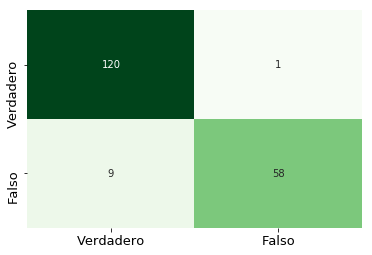

In [52]:
cnf = confusion_matrix(y_test, y_hat)
# Acomodamos datos para poder generar la matriz
cnf = cnf.T
matriz = pd.concat([pd.Series(cnf[0]), pd.Series(cnf[1])],axis=1)
matriz.columns = ['Verdadero', 'Falso']
matriz.index = ['Verdadero', 'Falso'] 
# Generamos heatmap para mostrar matriz de confusión
sns.heatmap(matriz, annot=True, fmt='d', cbar=False, cmap="Greens")


Basandonos en las métricas podemos concluir que el modelo presenta un bien rendimiento, lo único complejo son los 9+1 casos donde se presentan falsos postitivos. 